In [1]:
# basic 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50, 'display.max_rows', 200)
from itertools import combinations

# plot

import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import font_manager, rc

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


# models
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile
from scipy.stats.mstats import gmean
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from bayes_opt import BayesianOptimization
from sklearn.ensemble import VotingClassifier
from vecstack import StackingTransformer
from vecstack import stacking

%run import_modules.py  
%matplotlib inline

# For DNN modeling
import tensorflow as tf

# Tensorflow warning off
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
#  tf.logging.set_verbosity(tf.logging.ERROR) <- logging이 버전업그레이드에서 사용 X라함

# from tensorflow import set_random_seed 
# 위에 코드 안됨에 대한 답변: In Tensoflow2 there is no need to perform
# from tensorflow import set_random_seed
# in order to run
# set_random_seed(x)
# (as it was in older version)
# Only have to run
# import tensorflow
# tensorflow.random.set_seed(x)

tf.random.set_seed(2020)
import keras
from keras import backend as K
from keras.layers import * #Input, Dense
from keras.models import * #Model
from keras.optimizers import *
from keras.initializers import *
from keras.regularizers import *
from keras.utils.np_utils import *
from keras.utils.vis_utils import * #model_to_dot

Using TensorFlow backend.


read data

In [2]:
train = X_train_cnn_hidden = pd.read_csv('X_train_cnn_hidden.csv', encoding='cp949')
test = X_test_cnn_hidden = pd.read_csv('X_test_cnn_hidden.csv', encoding='cp949')
y_train = pd.read_csv('y_train.csv', encoding='cp949').gender

In [3]:
X_train_cnn_hidden

,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
0,0.072717,1.151970,1.021654,0.343519,0.104696,0.095997,0.450215,1.041780,0.799742,1.081851,0.990240,0.185262,0.950409,0.273133,0.121120,0.226478,0.512339,0.338446,0.155499,0.902878,0.914249,0.281801,0.136313,0.271594,0.324329,0.152943,0.335057,1.076024,0.154671,0.249712,0.196861,1.280637
1,0.099138,-0.176066,-0.082240,-0.012129,0.129237,0.122720,-0.010819,-0.043584,-0.100474,-0.227882,-0.270093,0.055906,-0.005734,0.424612,-0.199921,-0.033762,0.033330,-0.048169,0.024263,-0.209876,-0.126407,0.135632,-0.042621,0.020277,0.062644,0.107495,-0.174846,-0.223387,0.233890,-0.038420,0.182939,-0.236878
2,0.117899,-0.192835,-0.108160,0.137689,0.235482,0.061874,0.133768,-0.017286,-0.001746,-0.213690,-0.294954,0.144732,-0.054654,0.177957,0.084563,0.157400,0.137428,0.027771,-0.039270,-0.235700,-0.277447,0.165635,0.045991,-0.051799,0.374233,0.309879,0.010004,-0.344870,0.179501,-0.026841,0.232073,-0.261810
3,0.217766,0.577409,0.301428,0.259764,0.202313,0.240055,0.282168,0.418546,0.568550,0.414526,0.483262,0.293762,0.700693,0.260039,0.190564,0.119876,0.119553,0.280048,0.109940,0.422441,0.371293,0.239584,0.136881,0.262325,0.315605,0.119778,0.166527,0.237733,0.278135,0.247320,0.284798,0.516480
4,0.033859,-0.006845,-0.046622,-0.175963,-0.032874,-0.314592,-0.130444,0.221746,0.053102,-0.052906,-0.041020,-0.022576,-0.020257,0.040768,-0.322129,-0.180114,-0.046328,-0.057280,-0.124954,0.125003,0.025159,-0.082242,-0.050461,-0.145454,-0.168152,-0.129829,-0.218794,-0.072110,0.003770,-0.178679,0.153426,-0.194410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.123471,-0.168256,-0.152098,-0.087484,0.128232,-0.224098,-0.085233,-0.090171,-0.192667,-0.266065,-0.286578,0.044514,-0.122115,0.080347,-0.253613,-0.128683,0.061216,-0.029027,-0.063176,-0.349621,-0.282510,-0.026638,-0.015676,-0.026644,0.003923,-0.035064,-0.189709,-0.439881,-0.005227,-0.032546,0.155606,-0.355877
3496,0.131011,0.342843,0.596099,0.202867,0.223004,-0.016649,0.321470,0.190107,0.207011,0.361828,0.359897,0.125901,0.236803,0.181873,-0.003325,0.139797,0.410079,0.212764,0.119373,0.439711,0.402656,0.159948,-0.060877,0.168078,0.220438,0.111723,0.139578,0.417648,0.075763,0.080808,0.195932,0.333475
3497,0.034555,-0.226902,-0.164418,-0.241066,0.055689,-0.206608,-0.103901,-0.131636,-0.116755,-0.170313,-0.216510,-0.143834,-0.038594,0.045726,-0.322589,-0.117970,-0.066155,-0.111233,-0.205013,-0.215920,-0.220689,-0.013292,-0.052735,-0.106495,-0.128169,-0.066085,-0.218923,-0.310986,0.008550,-0.215580,0.204296,-0.221844
3498,0.041023,-0.011790,-0.070826,-0.226190,-0.003742,-0.296224,-0.211133,0.175627,-0.053102,0.009704,0.073167,-0.060374,-0.094085,0.008587,-0.347802,-0.168112,-0.085504,-0.086911,-0.158563,0.228418,0.036157,-0.085696,-0.063987,-0.191577,-0.185437,-0.185781,-0.227640,0.025232,-0.067466,-0.241634,0.153226,-0.276141


train the model(data has been transformed)

In [12]:
BatchNormalization?

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Train on 2800 samples, validate on 700 samples
Epoch 1/200
 - 1s - loss: 1.0838 - acc: 0.5493 - val_loss: 0.9408 - val_acc: 0.6471
Epoch 2/200
 - 0s - loss: 1.0204 - acc: 0.5771 - val_loss: 0.8896 - val_acc: 0.6486
Epoch 3/200
 - 0s - loss: 0.9773 - acc: 0.5807 - val_loss: 0.8488 - val_acc: 0.6486
Epoch 4/200
 - 0s - loss: 0.9128 - acc: 0.5989 - val_loss: 0.8225 - val_acc: 0.6486
Epoch 5/200
 - 0s - loss: 0.8895 - acc: 0.5911 - val_loss: 0.8018 - val_acc: 0.6486
Epoch 6/200
 - 0s - loss: 0.8544 - acc: 0.5921 - val_loss: 0.7832 - val_acc: 0.6486
Epoch 7/200
 - 0s - loss: 0.8274 - acc: 0.5982 - val_loss: 0.7696 - val_acc: 0.6486
Epoch 8/200
 - 0s - loss: 0.8087 - acc: 0.5971 - val_loss: 0.7564 - val_acc: 0.6486
Epoch 9/200
 - 0s - loss: 0.7812 - acc: 0.6179 - val_loss: 0.7425 - val_acc: 0.6486
Epoch 10/200
 - 0s - loss: 0.7697 - acc: 0.6114 - val_loss: 0.7237 - val_acc: 0.6486
Epoch 11/200
 - 0s - loss: 0.7595 - acc: 0.6071 - val_loss: 0.7140 - val_acc: 0.6486
Epoch 12/200
 - 0s - loss: 

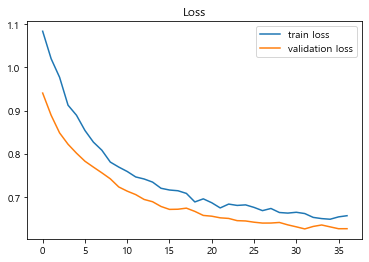

 33%|████████████████████████████                                                        | 1/3 [00:26<00:53, 26.58s/it]

AUC 0.8944880197700656


KeyboardInterrupt: 

In [25]:
# Set hyper-parameters for power mean ensemble 
N = 3
p = 3.5
preds = []
aucs = []

for i in tqdm(range(N)):    
    X_train, X_test = train, test

    ##### STEP 1: Randomize Seed
    SEED = np.random.randint(1, 10000)              
    random.seed(SEED)       
    np.random.seed(SEED)     
    if tf.__version__[0] < '2':  
        tf.set_random_seed(SEED)
    else:
        tf.random.set_seed(SEED)


    ##### STEP 4: Build a DNN Model

    # Define the Model architecture
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.9))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.9))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    # Train the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])  # adam,  , , , 
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    history = model.fit(train_x, train_y, epochs=200, batch_size=64, 
                        validation_data=(valid_x,valid_y), callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)], verbose=2)


    print(f'DNN learning curve {i+1}/{N}')
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    
    # Make Prediction
    auc = roc_auc_score(valid_y, model.predict(valid_x).flatten())
    aucs.append(auc)
    print('AUC', auc)
    preds.append(model.predict(X_test).flatten())   

### Validate the Models
print('\nValidation Summary:')
aucs = pd.Series(aucs)
print(aucs.sort_values(ascending=False))
print('mean={:.5f}, std={:.3f}'.format(aucs.mean(), aucs.std()))   

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

DNN learning curve 1/3


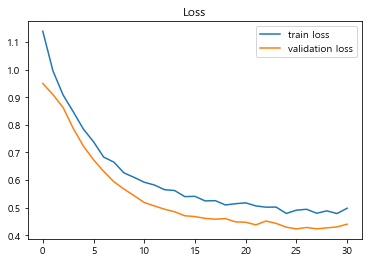

AUC 0.8813071572331486


 33%|████████████████████████████                                                        | 1/3 [00:05<00:10,  5.14s/it]

DNN learning curve 2/3


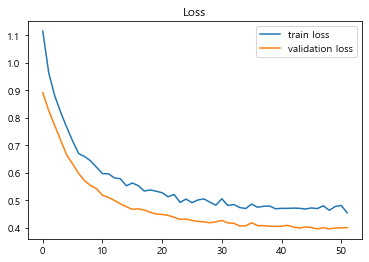

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:11<00:05,  5.64s/it]

AUC 0.9077146715523099
DNN learning curve 3/3


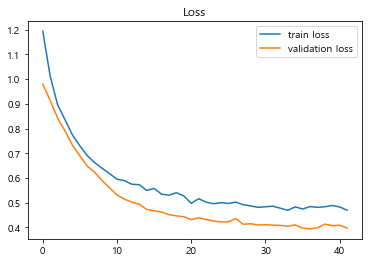

AUC 0.909841794810597


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:18<00:00,  6.19s/it]


Validation Summary:
2    0.909842
1    0.907715
0    0.881307
dtype: float64
mean=0.89962, std=0.016


In [19]:
# Set hyper-parameters for power mean ensemble 
N = 3
p = 3.5
preds = []
aucs = []

for i in tqdm(range(N)):    
    X_train, X_test = train, test

    ##### STEP 1: Randomize Seed
    SEED = np.random.randint(1, 10000)              
    random.seed(SEED)       
    np.random.seed(SEED)     
    if tf.__version__[0] < '2':  
        tf.set_random_seed(SEED)
    else:
        tf.random.set_seed(SEED)


    ##### STEP 4: Build a DNN Model

    # Define the Model architecture
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.45))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.45))
    model.add(BatchNormalization())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.45))
    model.add(Dense(1, activation='sigmoid'))

    # Train the Model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])  # adam,  , , , 
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    history = model.fit(train_x, train_y, epochs=150, batch_size=64, 
                        validation_data=(valid_x,valid_y), callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)], verbose=0)


    print(f'DNN learning curve {i+1}/{N}')
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.title("Loss")
    plt.show()
    
    # Make Prediction
    auc = roc_auc_score(valid_y, model.predict(valid_x).flatten())
    aucs.append(auc)
    print('AUC', auc)
    preds.append(model.predict(X_test).flatten())   

### Validate the Models
print('\nValidation Summary:')
aucs = pd.Series(aucs)
print(aucs.sort_values(ascending=False))
print('mean={:.5f}, std={:.3f}'.format(aucs.mean(), aucs.std()))   